In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import figure
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict
from settings import SECRET

In [2]:
cid = '5dd1f032529041c789a14d006f606b51'
secret = SECRET
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [3]:
def get_playlist_uri(link):
    return link.split("/")[-1].split("?")[0]

playlist_link = "https://open.spotify.com/playlist/4C2l2HYFzQjyQjyENdpoLc?si=eaf2151f9ea54168"
playlist_URI = get_playlist_uri(playlist_link)

In [4]:
feat_list = ['uri','name','artist_uri','artist_name','album',
             'track_pop','danceability','energy','key','loudness',
             'mode','speechiness','acousticness','instrumentalness','liveness',
             'valence','tempo','type']

def get_track_data(playlist):
    track_data = {feature: [] for feature in feat_list}
    for track in sp.playlist_tracks(playlist)["items"]:
        #URI
        track_uri = track["track"]["uri"]
        track_data['uri'].append(track_uri)
        #Track name
        track_name = track["track"]["name"]
        track_data['name'].append(track_name)
        #Main Artist
        artist_uri = track["track"]["artists"][0]["uri"]
        artist_info = sp.artist(artist_uri)
        track_data['artist_uri'].append(artist_uri)
        #Name, popularity, genre
        artist_name = track["track"]["artists"][0]["name"]
        artist_pop = artist_info["popularity"]
        artist_genres = artist_info["genres"]
        track_data['artist_name'].append(artist_name)
        #Album
        album = track["track"]["album"]["name"]
        track_data['album'].append(album)
        
        #Popularity of the track
        track_pop = track["track"]["popularity"]
        track_data['track_pop'].append(track_pop)

        track_audio_inf = sp.audio_features(track_uri)[0]
        del track_audio_inf['uri']
        for ky in track_audio_inf.keys():
            if ky in track_data.keys():
                track_data[ky].append(track_audio_inf[ky])
        track_df = pd.DataFrame(track_data)
    return track_df

track_df = get_track_data(playlist_URI)  
track_df.drop(['key','mode','type'],axis=1,inplace=True)
track_df  

,uri,name,artist_uri,artist_name,album,track_pop,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,spotify:track:0KVWVuutF9Dn8li4HdyAeU,"Archie, Marry Me",spotify:artist:3kzwYV3OCB010YfXMF0Avt,Alvvays,Alvvays,66,0.268,0.829,-4.592,0.0743,0.00986,0.434000,0.1420,0.203,117.351
1,spotify:track:3EEr6l5PYelwkrvvKX7N0X,Shut Up Kiss Me,spotify:artist:6mKqFxGMS5TGDZI3XkT5Rt,Angel Olsen,MY WOMAN,58,0.375,0.630,-5.131,0.0453,0.05520,0.000000,0.1070,0.349,115.728
2,spotify:track:2mlIzqDE7RaMaMx1UPdsXL,The Yeah Yeah Yeah Song,spotify:artist:16eRpMNXSQ15wuJoeqguaB,The Flaming Lips,At War With the Mystics,43,0.636,0.887,-4.354,0.0475,0.00257,0.000052,0.2930,0.350,107.984
3,spotify:track:5WbfFTuIldjL9x7W6y5l7R,Kingston,spotify:artist:5szilpXHcwOqnyKLqGco5j,Faye Webster,Atlanta Millionaires Club,79,0.730,0.355,-9.130,0.0359,0.15400,0.001550,0.1170,0.560,142.143
4,spotify:track:4qon9xHmMwWznurIzGTwL0,El Caporal,spotify:artist:43O3c6wewpzPKwVaGEEtBM,My Morning Jacket,Dark Was The Night (Red Hot Compilation),21,0.515,0.679,-5.755,0.0276,0.08720,0.000000,0.2050,0.568,100.832
5,spotify:track:7tITkd2OToE32ELyKO7OQM,Breezy Slide,spotify:artist:7jOY91ZU7kn86slH3fBbaD,Louie Zong,Breezy Slide,44,0.635,0.561,-12.549,0.0363,0.17200,0.000217,0.1890,0.575,101.727
6,spotify:track:534uBUA3qVXAp1jLfK5tL1,You've Got Me,spotify:artist:1MIe1z4RdqLqHSJsb7EBMm,The Greeting Committee,This Is It,50,0.630,0.634,-4.852,0.0252,0.29400,0.000000,0.3280,0.630,99.026
7,spotify:track:38OvTFIg5ZYRow2sA1jgKo,Everybody Wants to Love You,spotify:artist:7MoIc5s9KXolCBH1fy9kkw,Japanese Breakfast,Psychopomp,55,0.481,0.876,-3.263,0.0345,0.40800,0.153000,0.2830,0.682,129.921
8,spotify:track:1OuF7WqX6vbuGKfvH0HpRf,I Was Born (A Unicorn),spotify:artist:7L5HH5QtkDe7u2hJ1FUKFo,The Unicorns,Who Will Cut Our Hair When We're Gone? (Remast...,43,0.556,0.511,-7.848,0.1220,0.01170,0.000083,0.0316,0.735,144.546
9,spotify:track:51DZ0wUocQ8sQfjnibXVcD,Unbelievers,spotify:artist:5BvJzeQpmsdsFp4HGUYUEx,Vampire Weekend,Modern Vampires of the City,62,0.644,0.811,-7.774,0.0517,0.14900,0.000473,0.1700,0.817,154.909


<Figure size 640x480 with 0 Axes>

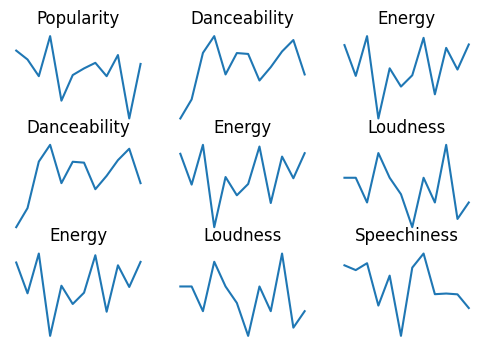

In [6]:
%matplotlib inline

audio_feats = ['Popularity','Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Positivity']
def playlist_plot(playlist_link):
    uri = get_playlist_uri(playlist_link)
    track_df = get_track_data(uri)
    plt.clf()
    fig, axs = plt.subplots(3,3)
    for i in range(3):
        for j in range(3):
            fig.set_size_inches(6,4)
            axs[i,j].plot(track_df.iloc[:,5+i+j])
            axs[i,j].axis('off')
            axs[i,j].set_title(audio_feats[i+j])
    plt.show()
playlist_plot(playlist_link)

<Figure size 640x480 with 0 Axes>

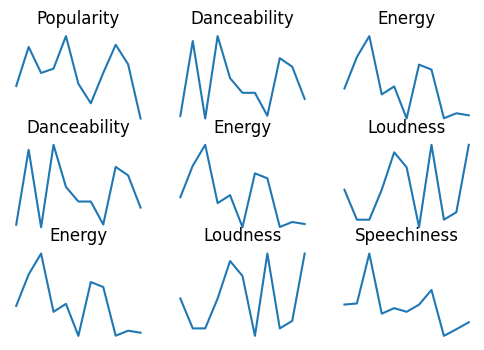

In [7]:
saslink = 'https://open.spotify.com/playlist/6aEcQKDvZ7nMl3C88ZVKMn?si=e62a80e495594da1'
playlist_plot(saslink)

<Figure size 640x480 with 0 Axes>

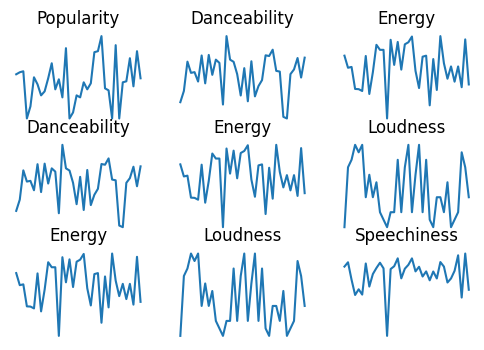

In [8]:
sadsongs = 'https://open.spotify.com/playlist/6wTUGHUIMfNvqCobTkVuPM?si=aec74df6bc32407d'
playlist_plot(sadsongs)